## Observations and Insights 

#Inferences made from the data:
#1 There is a strong correlation between mouse weight and average tumor volume in the Capomulin regimen, where lighter mice have a lower average tumor volume and viceversa for heavier mice.
#2 No outliers were found for the distribution of the final tumor volume for the Capomulin regimen, which indicates a rather normal distribution of the results of the regimen.
#3 Based on the information gathered from regimens that were selected to be analyzed, the Capomulin regimen showed the best results in terms of the final tumor volume.

In [1]:
# Dependencies and Setup
import random
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as st
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
new_df = pd.merge(mouse_metadata, study_results, how="left", on= "Mouse ID")
# Display the data table for preview
new_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
new_df_2=pd.DataFrame(new_df)
new_df_2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice
new_df_2["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
new_df_2.loc[new_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
new_df_2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df_3=pd.DataFrame(new_df_2)
new_df_3.drop_duplicates(subset=['Mouse ID'], keep='last', inplace=True)
dropped_duplicates_df=pd.DataFrame(new_df_3)
dropped_duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
new_count_dropped_duplicates=len(dropped_duplicates_df['Mouse ID'].unique())
new_count_dropped_duplicates

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [8]:
status_regimen_tumor_volume_mean= new_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
status_regimen_tumor_volume_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
status_regimen_tumor_volume_median= new_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
status_regimen_tumor_volume_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
status_regimen_tumor_volume_variance= new_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var()
status_regimen_tumor_volume_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
status_regimen_tumor_volume_std= new_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()
status_regimen_tumor_volume_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
status_regimen_tumor_volume_sem= new_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()
status_regimen_tumor_volume_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Assemble the resulting series into a single summary dataframe
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame({"Tumor Volume-Mean":status_regimen_tumor_volume_mean, "Tumor Volume-Median":status_regimen_tumor_volume_median,"Tumor Volume-Variance":status_regimen_tumor_volume_variance, "Tumor Volume-Std Dev":status_regimen_tumor_volume_std,"Tumor Volume-SEM":status_regimen_tumor_volume_sem})

summary_df

,Tumor Volume-Mean,Tumor Volume-Median,Tumor Volume-Variance,Tumor Volume-Std Dev,Tumor Volume-SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

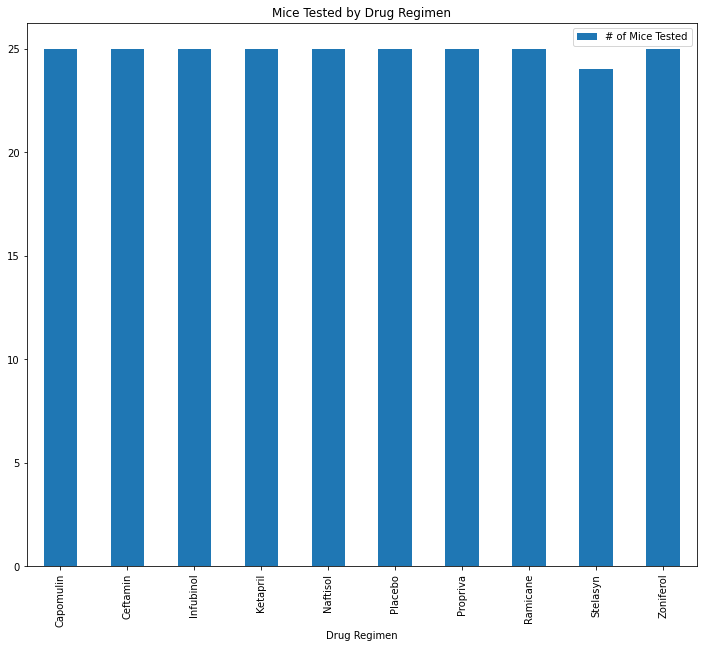

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
new_df2=pd.DataFrame(new_df)
mouse_count_unique=new_df2.groupby('Drug Regimen')['Mouse ID'].nunique()
mouse_count_unique_df=pd.DataFrame(mouse_count_unique)
mouse_count_unique_df1=mouse_count_unique_df.rename(columns={"Mouse ID":"# of Mice Tested"})
mouse_count_unique_df1.plot(kind="bar",figsize=(12,10))
plt.title("Mice Tested by Drug Regimen")
plt.show()
plt.tight_layout()


ConversionError: Failed to convert value(s) to axis units: 'Mouse ID'

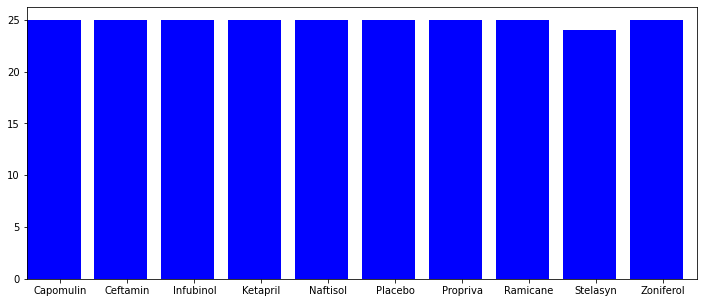

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mouse_count_unique2=new_df.groupby('Drug Regimen')['Mouse ID'].nunique()
mouse_count_unique2=mouse_count_unique2.reset_index()
mouse_count_unique2_df=pd.DataFrame(mouse_count_unique2)
mouse_count_unique2_df
x_axis=np.arange(len(mouse_count_unique2_df))
tick_locations=[value +0.5 for value in x_axis]
plt.figure(figsize=(12,5))
plt.bar(x_axis, mouse_count_unique2_df['Mouse ID'],color='b',alpha=1,align='edge')
plt.xticks(tick_locations,mouse_count_unique2_df['Drug Regimen'],rotation='horizontal')
plt.xlim(0,len(x_axis))
plt.ylim(0.5,max(mouse_count_unique2_df))
plt.title("Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [17]:
len(new_df[new_df['Sex'] == 'Male'])

958

In [18]:
len(new_df[new_df['Sex'] == 'Female'])

935

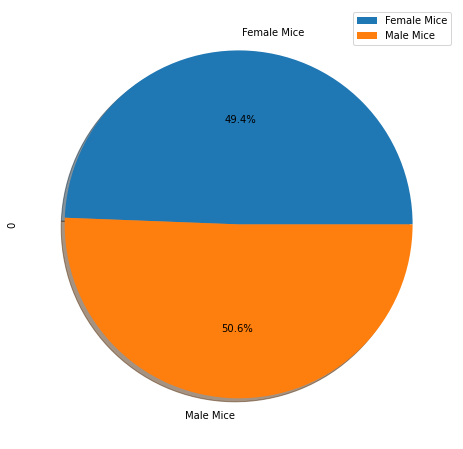

In [19]:
#Pie chart using pandas
df=pd.DataFrame([935,958], index=['Female Mice', 'Male Mice'])
# make the plot
df.plot(kind='pie', subplots=True,shadow = True,startangle=0, figsize=(8, 8), autopct='%1.1f%%')
# show the plot
plt.show()

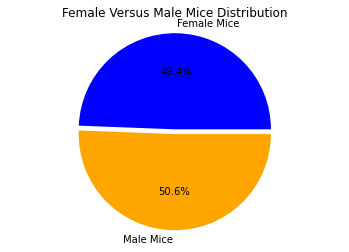

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_versus_male_mice_distribution = [935,958]
my_labels = ['Female Mice','Male Mice']
colors= ["blue","orange"]
explode=(0.05,0)
plt.pie(female_versus_male_mice_distribution,explode=explode,labels=my_labels,colors=colors,autopct='%1.1f%%')
plt.title('Female Versus Male Mice Distribution')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [ ]:
# Start by getting the last (greatest) timepoint for each mouse

In [21]:
new_df3_capomulin= new_df.loc[new_df["Drug Regimen"]=="Capomulin"].astype(object)
new_df3_sorted_capomulin=new_df3_capomulin.sort_values(["Mouse ID", "Timepoint"], ascending=False)
new_df3_sorted_capomulin.drop_duplicates(subset=['Mouse ID'], keep='first', inplace=True)
new_df3_sorted_capomulin2=new_df3_sorted_capomulin[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
new_df3_sorted_capomulin3=new_df3_sorted_capomulin2.sort_values(["Mouse ID"], ascending=True)
new_df3_sorted_capomulin3=new_df3_sorted_capomulin3.rename(columns={"Timepoint":"Last Timepoint","Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
new_df3_sorted_capomulin3

,Mouse ID,Drug Regimen,Last Timepoint,Final Tumor Volume (mm3)
309,b128,Capomulin,45,38.982878
299,b742,Capomulin,45,38.939633
64,f966,Capomulin,20,30.485985
244,g288,Capomulin,45,37.074024
360,g316,Capomulin,45,40.15922
440,i557,Capomulin,45,47.685963
204,i738,Capomulin,45,37.311846
337,j119,Capomulin,45,38.125164
317,j246,Capomulin,35,38.753265
380,l509,Capomulin,45,41.483008


In [22]:
new_df3_ramicane= new_df.loc[new_df["Drug Regimen"]=="Ramicane"].astype(object)
new_df3_sorted_ramicane=new_df3_ramicane.sort_values(["Mouse ID", "Timepoint"], ascending=False)
new_df3_sorted_ramicane.drop_duplicates(subset=['Mouse ID'], keep='first', inplace=True)
new_df3_sorted_ramicane2=new_df3_sorted_ramicane[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
new_df3_sorted_ramicane3=new_df3_sorted_ramicane2.sort_values(["Mouse ID"], ascending=True)
new_df3_sorted_ramicane3=new_df3_sorted_ramicane3.rename(columns={"Timepoint":"Last Timepoint","Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
new_df3_sorted_ramicane3

,Mouse ID,Drug Regimen,Last Timepoint,Final Tumor Volume (mm3)
327,a411,Ramicane,45,38.407618
430,a444,Ramicane,45,43.047543
214,a520,Ramicane,45,38.810366
174,a644,Ramicane,45,32.978522
289,c458,Ramicane,30,38.342008
154,c758,Ramicane,45,33.397653
272,d251,Ramicane,45,37.311236
400,e662,Ramicane,45,40.659006
49,g791,Ramicane,45,29.128472
184,i177,Ramicane,45,33.562402


In [23]:
new_df3_infubinol= new_df.loc[new_df["Drug Regimen"]=="Infubinol"].astype(object)
new_df3_sorted_infubinol=new_df3_infubinol.sort_values(["Mouse ID", "Timepoint"], ascending=False)
new_df3_sorted_infubinol.drop_duplicates(subset=['Mouse ID'], keep='first', inplace=True)
new_df3_sorted_infubinol2=new_df3_sorted_infubinol[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
new_df3_sorted_infubinol3=new_df3_sorted_infubinol2.sort_values(["Mouse ID"], ascending=True)
new_df3_sorted_infubinol3=new_df3_sorted_infubinol3.rename(columns={"Timepoint":"Last Timepoint","Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
new_df3_sorted_infubinol3

,Mouse ID,Drug Regimen,Last Timepoint,Final Tumor Volume (mm3)
463,a203,Infubinol,45,67.973419
473,a251,Infubinol,45,65.525743
530,a577,Infubinol,30,57.031862
540,a685,Infubinol,45,66.083066
637,c139,Infubinol,45,72.226731
669,c326,Infubinol,5,36.321346
742,c895,Infubinol,30,60.969711
800,e476,Infubinol,45,62.435404
834,f345,Infubinol,45,60.918767
949,i386,Infubinol,40,67.289621


In [24]:
new_df3_ceftamin= new_df.loc[new_df["Drug Regimen"]=="Ceftamin"].astype(object)
new_df3_sorted_ceftamin=new_df3_ceftamin.sort_values(["Mouse ID", "Timepoint"], ascending=False)
new_df3_sorted_ceftamin.drop_duplicates(subset=['Mouse ID'], keep='first', inplace=True)
new_df3_sorted_ceftamin2=new_df3_sorted_ceftamin[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
new_df3_sorted_ceftamin3=new_df3_sorted_ceftamin2.sort_values(["Mouse ID"], ascending=True)
new_df3_sorted_ceftamin3=new_df3_sorted_ceftamin3.rename(columns={"Timepoint":"Last Timepoint","Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
new_df3_sorted_ceftamin3

,Mouse ID,Drug Regimen,Last Timepoint,Final Tumor Volume (mm3)
493,a275,Ceftamin,45,62.999356
594,b447,Ceftamin,0,45.0
600,b487,Ceftamin,25,56.057749
617,b759,Ceftamin,30,55.742829
840,f436,Ceftamin,15,48.722078
940,h531,Ceftamin,5,47.784682
993,j296,Ceftamin,45,61.849023
1033,k210,Ceftamin,45,68.923185
1112,l471,Ceftamin,45,67.748662
1119,l490,Ceftamin,30,57.918381


### Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume_df=pd.DataFrame([capomulin_tumor_volume, ramicane_tumor_volume, infubinol_tumor_volume, ceftamin_tumor_volume])
final_tumor_volume_df

In [25]:
final_tumor_volume_df = pd.concat([new_df3_sorted_capomulin3, new_df3_sorted_ramicane3, new_df3_sorted_infubinol3, new_df3_sorted_ceftamin3],axis=0)
final_tumor_volume_df2=pd.DataFrame(final_tumor_volume_df)
final_tumor_volume_df2

,Mouse ID,Drug Regimen,Last Timepoint,Final Tumor Volume (mm3)
309,b128,Capomulin,45,38.982878
299,b742,Capomulin,45,38.939633
64,f966,Capomulin,20,30.485985
244,g288,Capomulin,45,37.074024
360,g316,Capomulin,45,40.15922
...,...,...,...,...
1743,x226,Ceftamin,0,45.0
1773,x581,Ceftamin,45,64.634949
1797,x822,Ceftamin,45,61.38666
1845,y769,Ceftamin,45,68.594745


In [ ]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers. 

In [26]:
final_tumor_volume = final_tumor_volume_df2['Final Tumor Volume (mm3)']
quartiles = final_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor value is: {lowerq}")
print(f"The upper quartile of final tumor value is: {upperq}")
print(f"The interquartile range of final tumor value is: {iqr}")
print(f"The median of final tumor value is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor value is: 37.1877438025
The upper quartile of final tumor value is: 59.930261755
The interquartile range of final tumor value is: 22.742517952499995
The median of final tumor value is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [27]:
outlier_tumor_value = final_tumor_volume_df2.loc[(final_tumor_volume_df2['Final Tumor Volume (mm3)'] < lower_bound) | (final_tumor_volume_df2['Final Tumor Volume (mm3)'] > upper_bound)]
#outlier_tumor_value

print(f"The minimum final tumor volume of the potential outliers is {outlier_tumor_value['Final Tumor Volume (mm3)'].min()}")
print(f"The maximum final tumor volume of the potential outliers is {outlier_tumor_value['Final Tumor Volume (mm3)'].max()}")

The minimum final tumor volume of the potential outliers is nan
The maximum final tumor volume of the potential outliers is nan


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest and highlight any potential outliers in the plot by changing their color and style.

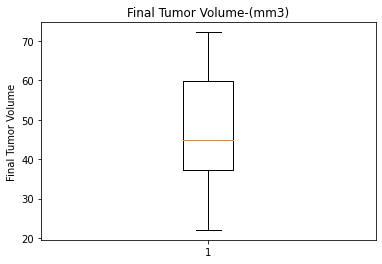

In [28]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume-(mm3)')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(final_tumor_volume)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

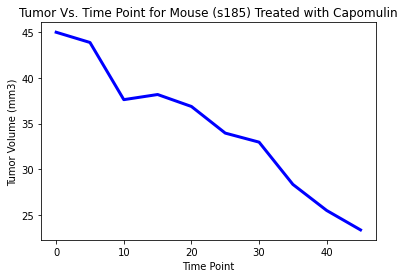

In [29]:
x_axis=np.arange(0,50,5)
y_axis=[45.000000,43.878496,37.614948,38.177232,36.866876,33.949940,32.959671,28.328531,25.472143,23.343598]
plt.title("Tumor Vs. Time Point for Mouse (s185) Treated with Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis,y_axis,color = 'blue', linewidth=3, linestyle='solid')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

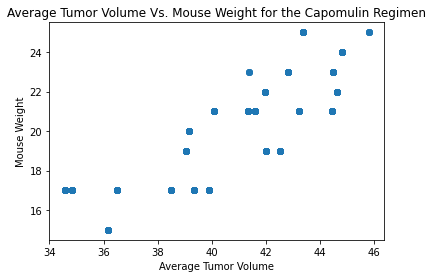

In [53]:
scatterplot_df = new_df[(new_df["Drug Regimen"] == "Capomulin")]
scatterplot_df2=pd.DataFrame(scatterplot_df)
scatterplot_df2
average_tumor_value_capomulin=scatterplot_df2.groupby(["Mouse ID","Drug Regimen"])
average_tumor_value_capomulin.head()

average_tumor_value_capomulin_df=pd.DataFrame(average_tumor_value_capomulin["Tumor Volume (mm3)"].mean().astype(float,0))
average_tumor_value_capomulin_df

#average_tumor_value_capomulin_df=average_tumor_value_capomulin_df.reset_index()

average_tumor_value_capomulin_df=average_tumor_value_capomulin_df.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
average_tumor_value_capomulin_df2=pd.DataFrame(average_tumor_value_capomulin_df)
average_tumor_value_capomulin_df2

#cols_to_use=average_tumor_value_capomulin_df2.columns.difference(average_tumor_value_capomulin.columns)
merge1 = pd.merge(scatterplot_df2,average_tumor_value_capomulin_df2,on='Mouse ID', how='outer')
merge1

plt.scatter(x=merge1["Average Tumor Volume (mm3)"],y=merge1["Weight (g)"])
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight")
plt.title("Average Tumor Volume Vs. Mouse Weight for the Capomulin Regimen")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen.

In [58]:
# Correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen.
print(merge1)
column_1 = merge1["Average Tumor Volume (mm3)"]
column_2 = merge1["Weight (g)"]
correlation = column_1.corr(column_2)
print(correlation)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       s185    Capomulin  Female           3          17          0   
1       s185    Capomulin  Female           3          17          5   
2       s185    Capomulin  Female           3          17         10   
3       s185    Capomulin  Female           3          17         15   
4       s185    Capomulin  Female           3          17         20   
..       ...          ...     ...         ...         ...        ...   
225     i557    Capomulin  Female           1          24         45   
226     r157    Capomulin    Male          22          25          0   
227     r157    Capomulin    Male          22          25          5   
228     r157    Capomulin    Male          22          25         10   
229     r157    Capomulin    Male          22          25         15   

     Tumor Volume (mm3)  Metastatic Sites  Average Tumor Volume (mm3)  
0             45.000000                 0                   34.

In [ ]:
# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen.

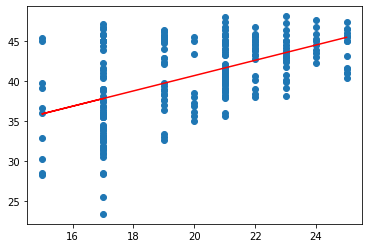

In [60]:
#print(merge1)
# values converts it into a numpy array
#-1 means that calculate the dimension of rows, but have 1 column
X = merge1.iloc[:, 4].values.reshape(-1, 1)
Y = merge1.iloc[:, 6].values.reshape(-1, 1)
# create object for the class
linear_regressor = LinearRegression()
# perform linear regression
linear_regressor.fit(X, Y)
# make predictions
Y_pred = linear_regressor.predict(X)

#to visualize
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()